1.

Proszę zaprojektować rozmyty system sterowania automatycznym podlewaniem grządki. Grządka ma 3m^2, a system podlewania może nawadniać w tempie maksymalnie 25l/dziennie, podczas, gdy zalecana ilość wody dla "zwyczajnych" warunków dla grządki w takim rozmiarze to 10l/dziennie.

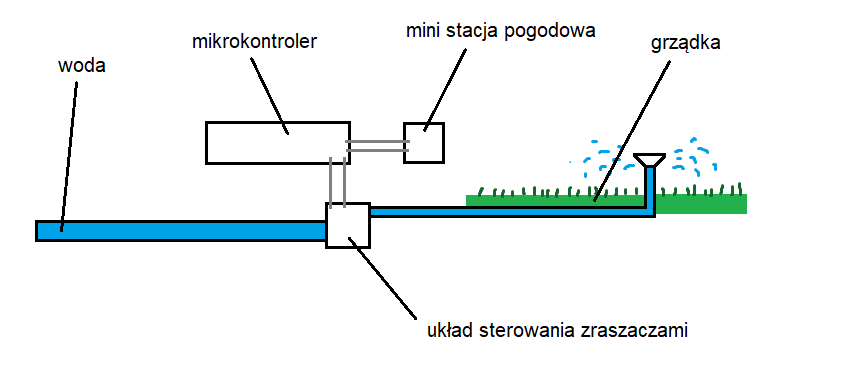

System jest sterowany elektronicznie i jest do niego podłączony higrometr (mierzący wilgotność względną w zakresie od 0% do 100%) i termometr. Temperatury są mierzone wyłącznie za dnia i znajdują się w zakresie 15°C - 35°C.Proszę zaprojektować układ rozmytego sterowania, układając reguły na podstawie następującej tabelki:

|                 | Sucho             | Przeciętnie                | Mokro      |
|-----------------|----------------------|----------------------|------------------|
| **Chłodno**     | Podlewaj średnio        | Podlewaj średnio     | Podlewaj mało    |
| **Ciepło**      | Podlewaj dużo        | Podlewaj średnio        | Podlewaj mało |
| **Gorąco**      | Podlewaj dużo | Podlewaj dużo        | Podlewaj średnio    |

Proszę samodzielnie zaproponować rozmyte funkcje przynależności i narysować je na wykresach. Proszę przedstawić heatmapę wynikowej funkcji ilości wody używanej dziennie w zależności od wilgotności i temperatury ukrytej w mechanizmie sterowania.

Ilość wody do podlania grządki: 12.502117013086988


C:\Users\aleks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


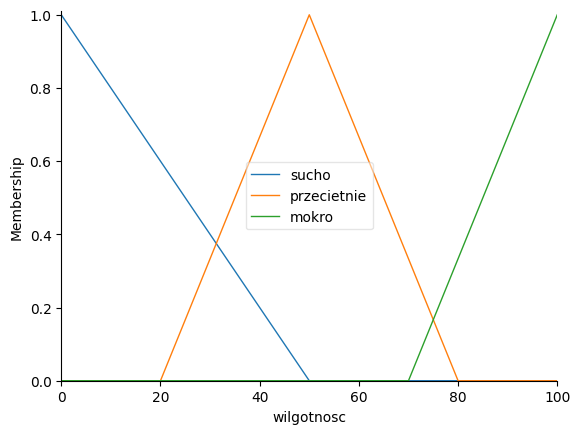

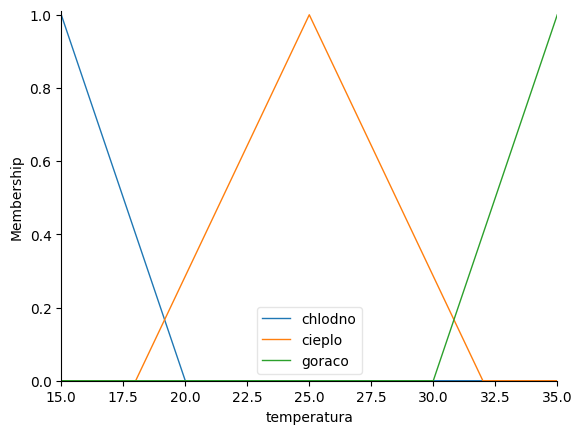

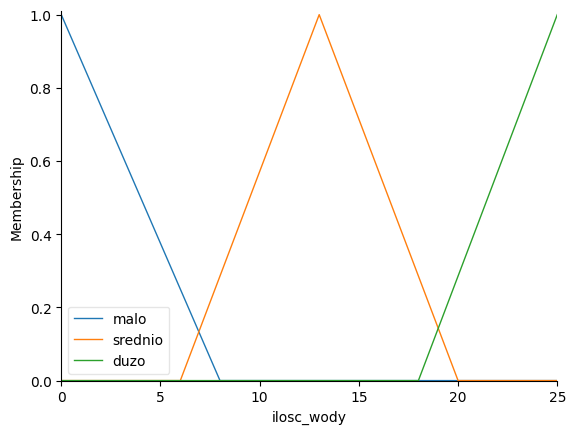

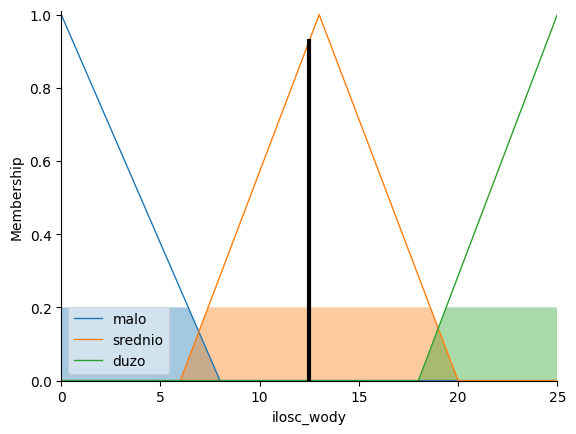

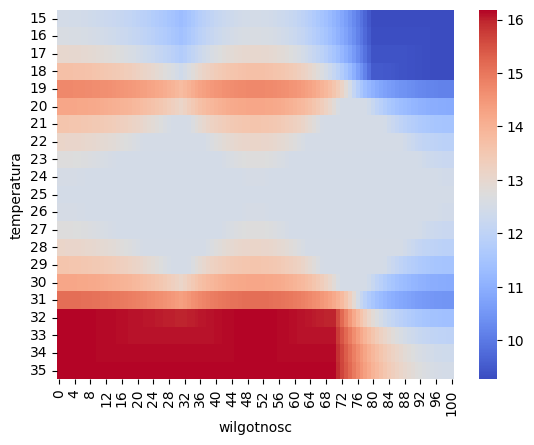

In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

wilgotnosc = ctrl.Antecedent(np.arange(0, 101, 1), 'wilgotnosc')
temperatura = ctrl.Antecedent(np.arange(15, 36, 1), 'temperatura')
ilosc_wody = ctrl.Consequent(np.arange(0, 26, 1), 'ilosc_wody')
wilgotnosc['sucho'] = fuzz.trimf(wilgotnosc.universe, [0, 0, 50])
wilgotnosc['przecietnie'] = fuzz.trimf(wilgotnosc.universe, [20, 50, 80])
wilgotnosc['mokro'] = fuzz.trimf(wilgotnosc.universe, [70, 100, 100])
temperatura['chlodno'] = fuzz.trimf(temperatura.universe, [15, 15, 20])
temperatura['cieplo'] = fuzz.trimf(temperatura.universe, [18, 25, 32])
temperatura['goraco'] = fuzz.trimf(temperatura.universe, [30, 35, 35])
ilosc_wody['malo'] = fuzz.trimf(ilosc_wody.universe, [0, 0, 8])
ilosc_wody['srednio'] = fuzz.trimf(ilosc_wody.universe, [6, 13, 20])
ilosc_wody['duzo'] = fuzz.trimf(ilosc_wody.universe, [18, 25, 25])
regula1 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['chlodno'], ilosc_wody['srednio'])
regula2 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['cieplo'], ilosc_wody['duzo'])
regula3 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['goraco'], ilosc_wody['duzo'])
regula4 = ctrl.Rule(wilgotnosc['przecietnie'] | temperatura['chlodno'], ilosc_wody['srednio'])
regula5 = ctrl.Rule(wilgotnosc['przecietnie'] | temperatura['cieplo'], ilosc_wody['srednio'])
regula6 = ctrl.Rule(wilgotnosc['przecietnie'] | temperatura['goraco'], ilosc_wody['duzo'])
regula7 = ctrl.Rule(wilgotnosc['mokro'] | temperatura['chlodno'], ilosc_wody['malo'])
regula8 = ctrl.Rule(wilgotnosc['mokro'] | temperatura['cieplo'], ilosc_wody['malo'])
regula9 = ctrl.Rule(wilgotnosc['mokro'] | temperatura['goraco'], ilosc_wody['srednio'])
system_sterowania = ctrl.ControlSystem([regula1, regula2, regula3, regula4, regula5, regula6, regula7, regula8, regula9])
sterowanie = ctrl.ControlSystemSimulation(system_sterowania)
wilgotnosc.view()
temperatura.view()
ilosc_wody.view()
sterowanie.input['wilgotnosc'] = 76
sterowanie.input['temperatura'] = 31
sterowanie.compute()
print("Ilość wody do podlania grządki:", sterowanie.output['ilosc_wody'])
ilosc_wody.view(sim=sterowanie)
plt.show()
import seaborn as sns
import pandas as pd
wilgotnosc_grid, temperatura_grid = np.meshgrid(np.arange(0, 101, 1), np.arange(15, 36, 1))
punkty_testowe = np.vstack((np.ravel(wilgotnosc_grid), np.ravel(temperatura_grid))).T
woda_wartosci = np.zeros(len(punkty_testowe))
for i, point in enumerate(punkty_testowe):
    sterowanie.input['wilgotnosc'] = point[0]
    sterowanie.input['temperatura'] = point[1]
    sterowanie.compute()
    woda_wartosci[i] = sterowanie.output['ilosc_wody']
data = pd.DataFrame(punkty_testowe, columns=['wilgotnosc', 'temperatura'])
data['ilosc_wody'] = woda_wartosci

pivot_table = data.pivot(index='temperatura', columns='wilgotnosc', values='ilosc_wody')
sns.heatmap(pivot_table, cmap='coolwarm')
plt.show()


**Wnioski:**
System bierze pod uwagę dwa główne czynniki, temperaturę i wilgotność. Z ich pomocą wylicza optymalną ilość wody jaką potrzebuje grządka.
Należy uzupełnic reguły na każdy możliwy scenariusz. W przeciwnym wypadku nasz program może nie zadziałać.
Na heatmapie widać, że przy wysokiej wilgotności nigdy nie jest potrzebne podlewanie. Widać również ,że im wyższa jest temperatura tym więcej wody będzie potrzebne.
Dla wartości środkowych, ilość wody odpowiednio zmienia się razem z wilgotnością i ciepłem.

2.

Proszę zastanowić się, jaką dodatkową zmienną można wprowadzić do systemu, np. oczekiwany poziom deszczu następnego dnia, wilgotność gleby, nasłonecznienie, siłę wiatru, itp. Problem jest praktyczny, więc proszę zastanowić się przede wszystkim nad takimi zmiennymi, które da się zmierzyć używając elektroniki lub pobrać z jakiegoś internetowego API (np. pogodowego). Proszę ustalić dla tej zmiennej jednostkę, zaproponować jej przynależność do zbiorów rozmytych oraz reguły wnioskowania. Proszę przedstawić co najmniej 4 heatmapy zależności nadawniania od temperatury i wilgotności dla 4 wartości zaproponowanej przez państwa zmiennej. Proszę też podać, jakim czujnikiem lub z jakiego API można pobrać te dane.

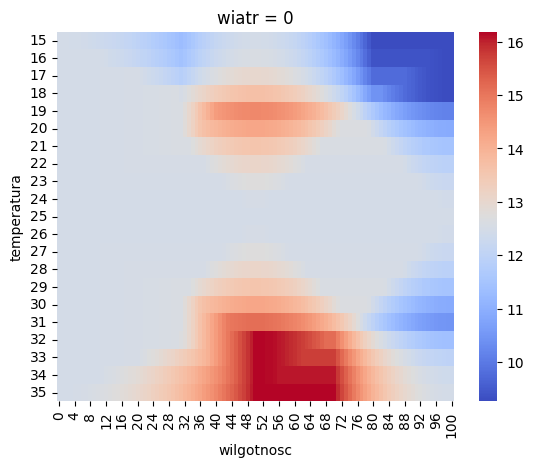

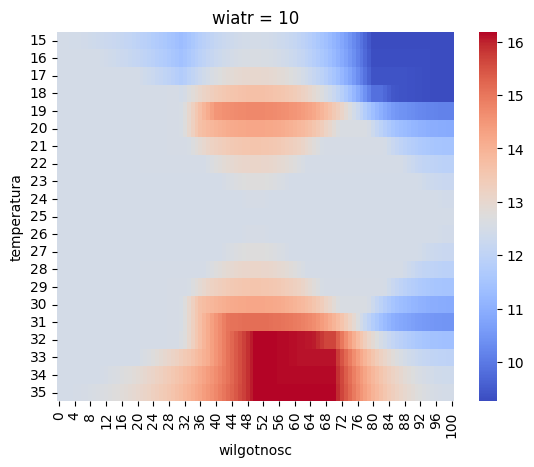

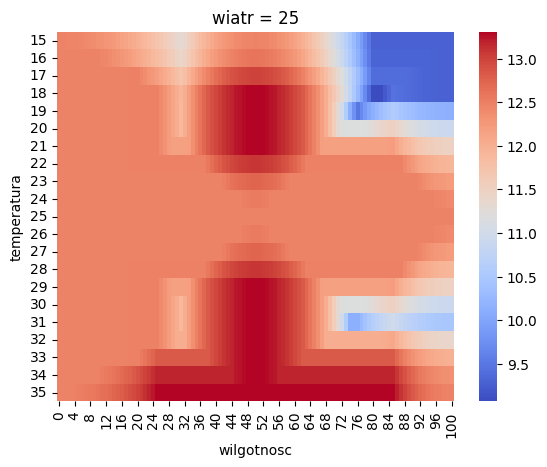

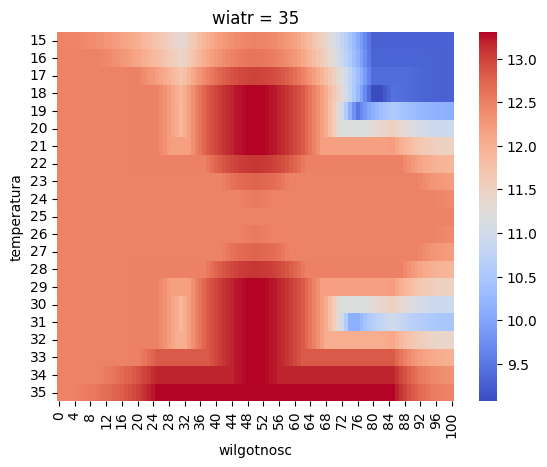

In [41]:
wiatr = ctrl.Antecedent(np.arange(0, 51, 1), 'wiatr')
wiatr['brak'] = fuzz.trimf(wiatr.universe, [0, 0, 10])
wiatr['lekki'] = fuzz.trimf(wiatr.universe, [5, 15, 25])
wiatr['umiarkowany'] = fuzz.trimf(wiatr.universe, [20, 30, 40])
wiatr['silny'] = fuzz.trimf(wiatr.universe, [35, 50, 50])
regula10 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['chlodno'] | wiatr['brak'] | wiatr['lekki'], ilosc_wody['srednio'])
regula11 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['chlodno'] | wiatr['umiarkowany'] | wiatr['silny'], ilosc_wody['malo'])
regula12 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['cieplo'] | wiatr['brak'] | wiatr['lekki'], ilosc_wody['duzo'])
regula13 = ctrl.Rule(wilgotnosc['sucho'] | temperatura['cieplo'] | wiatr['umiarkowany'] | wiatr['silny'], ilosc_wody['srednio'])
system_sterowania = ctrl.ControlSystem([regula1, regula2, regula3, regula4, regula5, regula6, regula7, regula8, regula9, regula10, regula11])
sterowanie = ctrl.ControlSystemSimulation(system_sterowania)
for wiatr_value in [0, 10, 25, 35]:
    woda_wartosci = np.zeros(len(punkty_testowe))
    for i, point in enumerate(punkty_testowe):
        sterowanie.input['wilgotnosc'] = point[0]
        sterowanie.input['temperatura'] = point[1]
        sterowanie.input['wiatr'] = wiatr_value
        sterowanie.compute()
        woda_wartosci[i] = sterowanie.output['ilosc_wody']
    data = pd.DataFrame(punkty_testowe, columns=['wilgotnosc', 'temperatura'])
    data['ilosc_wody'] = woda_wartosci
    pivot_table = data.pivot(index='temperatura', columns='wilgotnosc', values='ilosc_wody')
    sns.heatmap(pivot_table, cmap='coolwarm')
    plt.title(f'wiatr = {wiatr_value}')
    plt.show()

**Wnioski:**
Wprowadzenie siły wiatru, pozwala na bardziej precyzyjne sterowanie systemem podlewania, jako że im większa jego prędkość tym szybsze jest parowanie wody.
Nowe reguły sterowania uwzględniają różne kombinacje stanów wilgotności, temperatury i siły wiatru. Na przykład, jeśli jest sucho, chłodno i wiatr jest lekki, system zdecyduje, że potrzeba średniej ilości wody do podlewania.
Na heatmapach można zauważyć, że ilość wody zwiększa się z rosnącą temperaturą i malejącą wilgotnością, ale zmniejsza się z rosnącą siłą wiatru.
Dane o sile wiatru można pobrać z różnych internetowych API pogodowych lub zmierzyć za pomocą anemometru.

3.

Proszę zaproponować rozmyty system wnioskowania dla dowolnego wybranego (ale różnego od poruszanych dotychczas) problemu. Proszę wziąć pod uwagę co najmniej trzy zmienne wejściowe i każdą zmienną podzielić na co najmniej trzy zbiory rozmyte. Proszę stworzyć co najmniej 5 reguł i skomentować wyniki.

Ryzyko inwestycji: 5.595238095238093


C:\Users\aleks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


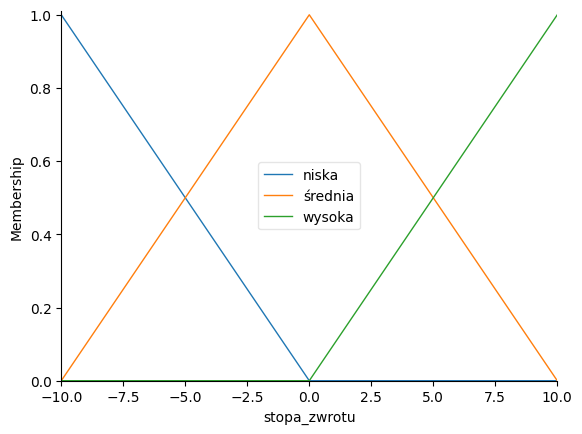

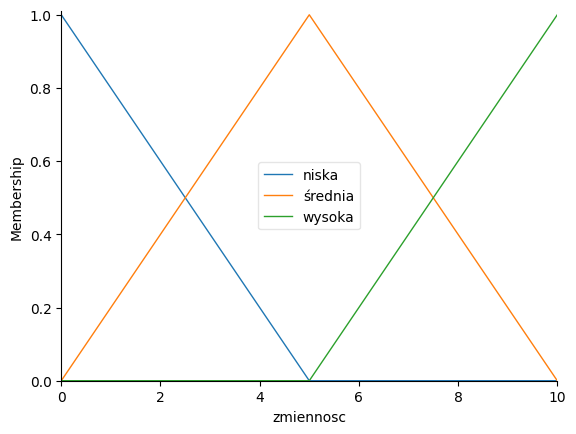

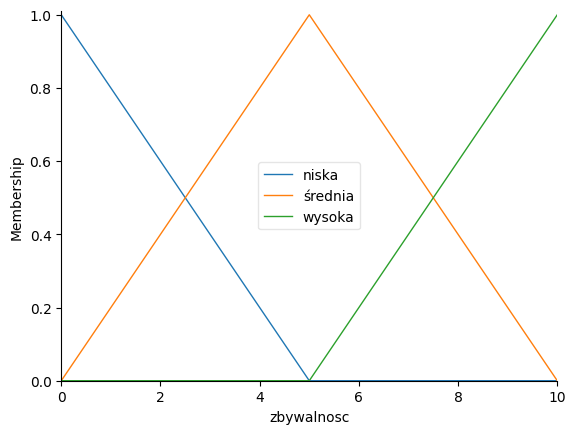

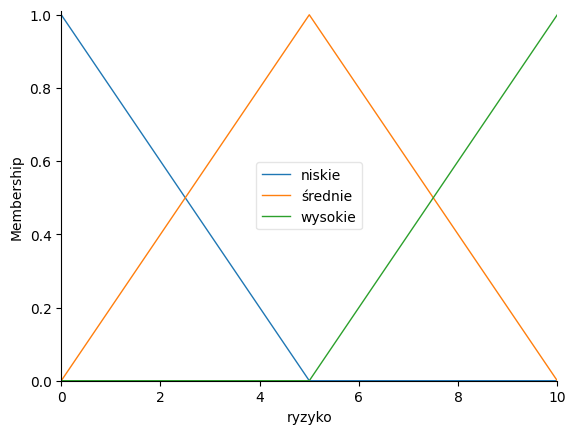

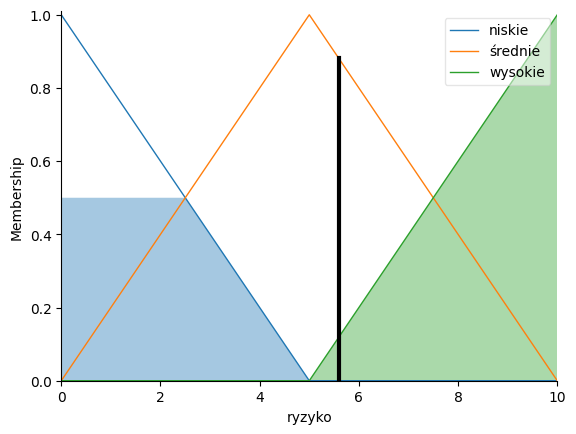

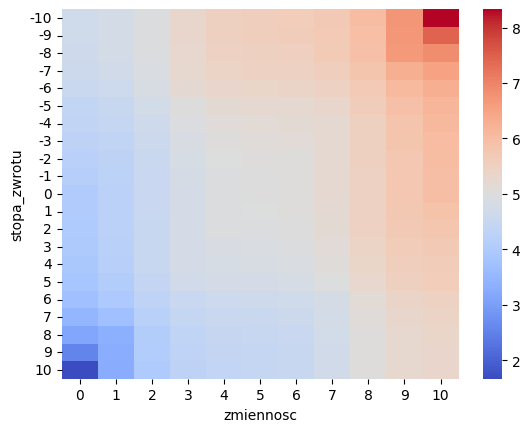

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

stopa_zwrotu = ctrl.Antecedent(np.arange(-10, 11, 1), 'stopa_zwrotu')
zmiennosc = ctrl.Antecedent(np.arange(0, 11, 1), 'zmiennosc')
zbywalnosc = ctrl.Antecedent(np.arange(0, 11, 1), 'zbywalnosc')
ryzyko = ctrl.Consequent(np.arange(0, 11, 1), 'ryzyko')
stopa_zwrotu.automf(names=['niska', 'średnia', 'wysoka'])
zmiennosc.automf(names=['niska', 'średnia', 'wysoka'])
zbywalnosc.automf(names=['niska', 'średnia', 'wysoka'])
ryzyko.automf(names=['niskie', 'średnie', 'wysokie'])
regula1 = ctrl.Rule((zbywalnosc['wysoka'] & stopa_zwrotu['wysoka']) | zmiennosc['niska'] | (zbywalnosc['wysoka'] & stopa_zwrotu['średnia']) | (zbywalnosc['średnia'] & stopa_zwrotu['wysoka']), ryzyko['niskie'])
regula2 = ctrl.Rule((zbywalnosc['średnia'] & stopa_zwrotu['średnia']) | zmiennosc['średnia'] | (zbywalnosc['średnia'] & stopa_zwrotu['średnia']), ryzyko['średnie'])
regula3 = ctrl.Rule((zbywalnosc['niska'] & stopa_zwrotu['niska']) | zmiennosc['wysoka'] | (zbywalnosc['niska'] & stopa_zwrotu['średnia']) | (zbywalnosc['średnia'] & stopa_zwrotu['niska']), ryzyko['wysokie'])
regula4 = ctrl.Rule(zbywalnosc['wysoka'] & stopa_zwrotu['niska'] & zmiennosc['niska'], ryzyko['średnie'])
regula5 = ctrl.Rule(zbywalnosc['niska'] & stopa_zwrotu['wysoka'] & zmiennosc['wysoka'], ryzyko['średnie'])
ryzyko_ctrl = ctrl.ControlSystem([regula1, regula2, regula3, regula4, regula5])
ryzyko_sim = ctrl.ControlSystemSimulation(ryzyko_ctrl)
stopa_zwrotu.view()
zmiennosc.view()
zbywalnosc.view()
ryzyko.view()
ryzyko_sim.input['stopa_zwrotu'] = 5
ryzyko_sim.input['zmiennosc'] = 15
ryzyko_sim.input['zbywalnosc'] = 13
ryzyko_sim.compute()
print("Ryzyko inwestycji:", ryzyko_sim.output['ryzyko'])
ryzyko.view(sim=ryzyko_sim)
plt.show()
import seaborn as sns
import pandas as pd
stopa_zwrotu_grid, zmiennosc_grid, zbywalnosc_grid = np.meshgrid(np.arange(-10, 11, 1), np.arange(0, 11, 1), np.arange(0, 11, 1))
punkty_testowe = np.vstack((np.ravel(stopa_zwrotu_grid), np.ravel(zmiennosc_grid), np.ravel(zbywalnosc_grid))).T
ryzyka = np.zeros(len(punkty_testowe))
for i, point in enumerate(punkty_testowe):
    ryzyko_sim.input['stopa_zwrotu'] = point[0]
    ryzyko_sim.input['zmiennosc'] = point[1]
    ryzyko_sim.input['zbywalnosc'] = point[2]
    ryzyko_sim.compute()
    ryzyka[i] = ryzyko_sim.output['ryzyko']
data = pd.DataFrame(punkty_testowe, columns=['stopa_zwrotu', 'zmiennosc', 'zbywalnosc'])
data['ryzyko'] = ryzyka
pivot_table = data.pivot_table(index='stopa_zwrotu', columns='zmiennosc', values='ryzyko')
sns.heatmap(pivot_table, cmap='coolwarm')
plt.show()

**Wnioski:**
Stworzony został system rozmyty oceny ryzyka inwestycji na podstawie trzech zmiennych wejściowych: stopy zwrotu, zmienności i zbywalności. Każda z tych zmiennych została podzielona na trzy zbiory rozmyte: niski, średni i wysoki.
Heatmapa wynikowa wskazuje poprawny rozkład ryzyka inwestycji w zależności od poziomu stopy zwrotu oraz zmienności danego podmiotu.